In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
import math
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PI                = 3.14159265359
TWOPI             = 6.28318530718
DE2RA             = 0.01745329252
RA2DE             = 57.2957795129
ERAD              = 6378.135
ERADM             = 6378135.0
AVG_ERAD          = 6371.0
FLATTENING        = 1.0/298.257223563
                                  # Earth flattening (WGS '84)
EPS               = 0.000000000005
KM2MI             = 0.621371
GEOSTATIONARY_ALT = 35786.0    # km

In [3]:
def path_length(lat1,lon1,lat2,lon2):
	#b = arccos ( cos (90 - lat2) * cos (90 - lat1) + sin (90 - lat2) * sin (90 - lat1) * cos (lon2 - lon1) )
	b = math.acos ( math.cos (math.radians(90 - lat2)) * math.cos (math.radians(90 - lat1)) + math.sin (math.radians(90 - lat2)) * math.sin (math.radians(90 - lat1)) * math.cos (math.radians(lon2 - lon1)) )
    
	return b * ERAD 

def azimuth_between_two_points(lat1,lon1,lat2,lon2):
	b = path_length(lat1,lon1,lat2,lon2) / ERAD
	A = math.asin ( math.sin (math.radians(90 - lat2)) * math.sin (math.radians(lon2 - lon1)) / math.sin (b) )
	return A


def latloncalc(lat1, lon1, distance, azimuth):
    b = distance / ERAD
    a = math.acos(math.cos(b)*math.cos(math.radians(90 - lat1)) + math.sin(math.radians(90 - lat1))*math.sin(b) * math.cos(math.radians(azimuth)))
    B = math.asin(math.sin(b)*math.sin(math.radians(azimuth))/math.sin(a))
    lat2 = 90 - math.degrees(a)
    lon2 = math.degrees(B) + lon1
    #pair<double, double> latlon = std :: make_pair<lat2,lon2>;
    return lat2,lon2 


In [4]:

def azim_elev(lat1,lon1,lat2,lon2):
	lat2 = 0 # Satallite above equator
	# lon2 of satallite is decided on basis of which satellite we use atm
	b = path_length(lat1,lon1,lat2,lon2) / ERAD
	A = math.asin ( math.sin(math.radians(90 - lat2)) * math.sin(math.radians(lon2 - lon1)) / math.sin (b))
	R = ERAD
	h = GEOSTATIONARY_ALT
	d = math.sqrt(R*R + (R+h)*(R+h) - 2*R*(R+h)*math.cos(b))
	elevation_angle = math.acos((R+h)*math.sin(b)/d)
	
	return math.degrees(A) , math.degrees(elevation_angle)

In [5]:
def change_in_azi_elev(lat1,lon1,distance,azimuth,satlat,satlon):
    latlon_dest = latloncalc(lat1,lon1,distance,azimuth)
    lat2 = latlon_dest[0]
    lon2 = latlon_dest[1]
    azim_elev1 =  azim_elev(lat1,lon1,satlat,satlon)
    azim_elev2 =  azim_elev(lat2,lon2,satlat,satlon)
    diff_azi = azim_elev1[0] - azim_elev2[0]
    diff_elev = azim_elev1[1] - azim_elev2[1]
    return math.degrees(diff_azi),math.degrees(diff_elev)

Text(0.5, 0, 'z')

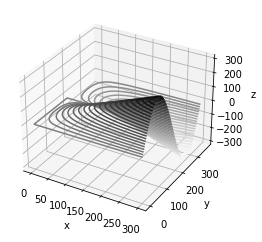

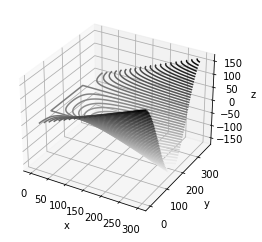

In [6]:
lat1 = 50
lon1 = 50
satlat = 0
satlon = 50
distance = np.linspace(0, 300, 300)
azimuth = np.linspace(0, 360, 360)


f2 = np.vectorize(change_in_azi_elev)
X, Y = np.meshgrid(distance, azimuth)
Z,Z1 = f2(lat1,lon1,X,Y,satlat,satlon)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z1, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [7]:
print(path_length(0,0,50,50)/ERAD)
print(math.degrees(azimuth_between_two_points(0,0,50,50)))
print(latloncalc(30,30,3000,90))
print(azim_elev(0,0,50,90))
print(change_in_azi_elev(50,50,40,30,0,30)[0])

1.1448574959546012
32.73240720961235
(26.468343920116006, 60.415792530466604)
(90.0, 8.601871985848334)
13.61260582667798
